# Introduction au Deep Learning appliqué aux images

## Tasks
![https://xkcd.com/1425/](https://imgs.xkcd.com/comics/tasks.png)

*Title text:* In the 60s, [Marvin Minsky](https://fr.wikipedia.org/wiki/Marvin_Minsky) assigned a couple of undergrads to spend the summer programming a computer to use a camera to identify objects in a scene. He figured they'd have the problem solved by the end of the summer. Half a century later, we're still working on it. 

https://xkcd.com/1425/

## TP4 : Les basiques
  - Vue d'ensemble des problématiques traitées par le Deep Learning sur les images
  - Les basiques (une redite?) : Le perceptron
  - Application : Coder un perceptron en python
  - Présentation de Pytorch
  - Application : Prise en main de pytorch réseau simple
  - Application : ~~classification d'image~~
    
## TP5 : Autoencodeurs

## TP6 : GAN    

# Les prouesses du deep learning sur les images

https://github.com/kjw0612/awesome-deep-vision


## super resolution
http://lxu.me/projects/dcnn/results.html

## segmentation
http://mi.eng.cam.ac.uk/projects/segnet/

## Human pose estimation
https://beyondminds.ai/an-overview-of-human-pose-estimation-with-deep-learning/

## Art ? 
https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html

## Art
https://github.com/jcjohnson/neural-style

## Fake 
https://thispersondoesnotexist.com/

https://thiscatdoesnotexist.com/

## Image to text
https://cs.stanford.edu/people/karpathy/deepimagesent/

## Image from text : Dall-e
https://openai.com/blog/dall-e/

# Au commencement il y a les neurones

![](https://resize1.prod.docfr.doc-media.fr/rcrop/650,380,center-middle/img/var/doctissimo/storage/images/fr/www/sante/maladies-du-cerveau/transmissions-neuronales/transmission-neuronale/374802-2-fre-FR/transmission-neuronale.jpg)

# En informatique ça ressemble plutôt à ça

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/ArtificialNeuronModel_francais.png/1280px-ArtificialNeuronModel_francais.png)

# Perceptron 

On a des entrées $X$ vecteur de réels de taille n.

On a des poids $W$ vecteur de réels de taille n.

On obtient à la sortie la valeur $z$ définie par $z= \sum_i x_i w_i$

Puis l'output est généré en passant pas la fonction d'activation $\phi$.
On a donc $o = \phi(z)$

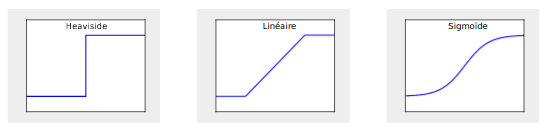

La sigmoide se définit comme:

$$\phi(x) = \frac{1}{1+\exp(-x)}$$

**C'est une fonction dérivable!**

Pourquoi est-ce important? 

On va pouvoir facilement faire des calculs d'erreur et une descente de gradient.

On définit l'erreur d'un exemple $k$ comme $E_k = (y_k - o_k)$

$y_k$ étant la vraie target de l'exemple.

Lors de l'apprentissage, on veut réduire l'erreur globale sur les exemples.

On calcule une erreur classique :
$$E = \frac{1}{2} \sum_k E_k^2 = \frac{1}{2} \sum_k (y_k - o_k)^2$$

Comment on procède pour faire diminuer cette erreur?

On applique la méthode de descente de gradient.

## Descente de gradient

On va chercher à réduire l'erreur dans *la direction de l'erreur*. Cette direction est définie par le gradient dans le réseau.

On peut calculer la dérivée partielle de l'erreur par rapport aux poids du réseau:

$$ \frac{\partial E}{\partial w_i} = - (y_k - o_k) \phi' x_i$$

Utilisez la "chain rule" (dérivation des fonctions composées)


On obtient donc la "Delta rule" qui permet de mettre à jour les poinds d'un perceptron:

$$w_i = w_i + \alpha \phi' (y_k -o_k) x_i$$

$\alpha$ étant un paramètre qu'on appelle le 'learning rate'.

# Les mains dans le cambouis : un perceptron en python

Vous souhaitez apprendre la fonction binaire OR.

Commencez par générer votre jeu de données.

Générez les ensembles d'inputs, et les target associées.

*hint* :  Vous devez avoir 2 variables en entrées, et votre jeu de donnée doit avoir 4 exemples distincts

In [ ]:
import numpy as np
X = 
y = 
X, y

Initialisez votre couche cachée W : np.random ...

In [ ]:
W = 
W

Codez la sigmoid:

In [ ]:
import math

def sigmoid(x):
    return 12

Codez la dérivée de la sigmoid !

In [ ]:
def dsigmoid(x):
    return 42

Maintenant c'est de l'assemblage.

Faites une boucle qui va faire plusieures passes d'entrainement.
 - Faites passer les inputs dans le réseau.
 - Calculez l'erreur
 - calculer la mise à jour des poids

In [ ]:
def perceptron(W, X_input):
    return 2022

Faites un graphe qui montre les erreurs au fil des epochs 

**Hint** : Il faut sauvegarder les erreurs dans la boucle de la cellule du dessus

In [ ]:
import matplotlib.pyplot as plt

plt.title("Epoch error");

Ca a fitté?

Prouvez le moi!

# Nettoyez vous les mains y a des outils plus sympa !



## Introduction à pytorch

Pour ceux qui sont en avance
=> https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Supercharged numpy like data structure

In [ ]:
import torch
import numpy as np
torch.cuda.is_available()

In [ ]:
torch.__version__

In [ ]:
a = np.random.randn(3,3)
a

In [ ]:
b = torch.Tensor(a)
b

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
c = b.to(device)
c

## Autograd

![](https://i.chzbgr.com/full/8983265024/h4F684A2F/differentiate-all-the-continuous-functions)

[tutoriel autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)
et [ça aussi](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

In [ ]:
# requires_grad
x = torch.ones(2, 2, requires_grad=True)
print(x)

In [ ]:
y = x + 2
y

In [ ]:
out = y.mean()
out

In [ ]:
out.backward()

In [ ]:
x.grad

# Coder un réseau de neurone avec pytorch

Les outils sont disponibles dans [**torch.nn**](https://pytorch.org/docs/stable/nn.html) 

Pour définir un réseau il suffit d'hériter de la classe **torch.nn.Module** et de définir la méthode **forward** qui va transformer vos inputs en outputs.

La méthode **backward** qui permet de rétropropager les gradients est calculée automatiquement par **autograd** !


## Loss function
Pour entrainer un réseau il faut définir une loss fonction (nos moindres carrés du perceptron). Il existe pleins de fonctions de perte qui sont à choisir en fonction de vos problèmes.

Les loss disponibles de base sont [ici](https://pytorch.org/docs/stable/nn.html#loss-functions)

## Backprop et optimizers

On a maintenant tout pour faire apprendre notre réseau, il n'y a plus qu'à appliquer la backpropagation!

Et pytorch nous aide car il y a eu des évolutions depuis la définition de la descente de gradient. Il définit toute une liste d'**optimizer**.

https://pytorch.org/docs/stable/optim.html

## Recodez le perceptron AND avec pytorch

Refaites le 1er exercice en pytorch 

On défini tout d'abord notre modèle

In [ ]:
import torch.nn as nn

# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module
class Model(nn.Module):
    ...

On peut alors instancier notre modele

In [ ]:
model = Model()

Choix d'une fonction de loss

Choix d'un optimizer

Convertissons le dataset pour qu'il soit "pytorch friendly"

Créons une epoch

Il suffit maintenant de faire plusieurs epoch

In [ ]:
import matplotlib.pyplot as plt

plt.title("Epoch error");

Ca a fitté?

Prouvez le moi!